In [1]:
import pandas as pd
df = pd.read_csv('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv')
obj_list = df.columns[df.dtypes == 'object'].values.tolist()
for l in obj_list:
    df[l] = pd.to_numeric(df[l], errors='coerce')
df["defects"] = df["defects"].astype(int)
df.dropna(inplace=True)

In [2]:
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv')
obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)
#data = data.drop('File', axis=1)
X = data.iloc[:,0:]  #independent columns
y = data.iloc[:,-1]    #target column i.e Realbug
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs         Score
9             e  4.130875e+08
11            t  2.294931e+07
5             v  2.171643e+06
4             n  2.466837e+05
18     total_Op  1.481198e+05
19   total_Opnd  9.811583e+04
0           loc  9.153106e+04
12       lOCode  5.650808e+04
20  branchCount  2.441086e+04
17    uniq_Opnd  2.074817e+04


In [4]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['e', 't', 'v', 'n', 'total_Op', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [5]:
testing_data

,e,t,v,n,total_Op,defects
10490,79.25,4.40,31.70,10.0,6.0,0
7211,210218.88,11678.83,3445.54,568.0,363.0,0
7109,161.94,9.00,43.19,13.0,8.0,0
5567,11966.77,664.82,599.09,115.0,68.0,0
6677,17.41,0.97,11.61,5.0,3.0,0
...,...,...,...,...,...,...
7415,464855.46,25825.30,7880.05,1096.0,620.0,0
5701,12800.51,711.14,571.59,106.0,69.0,0
8302,32324.04,1795.78,1005.29,180.0,104.0,0
413,6239.78,346.65,332.79,77.0,52.0,1


In [6]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [7]:
y_test.value_counts()

0    2619
1     645
Name: defects, dtype: int64

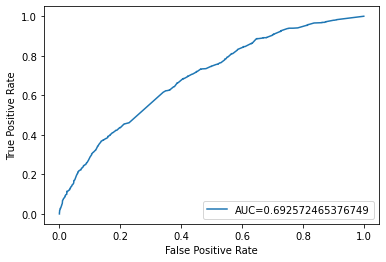

In [8]:
from sklearn import metrics
from matplotlib import pyplot as plt
y_pred_proba = our_rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [9]:
X_test.index.values.tolist()

[10490,
 7211,
 7109,
 5567,
 6677,
 9918,
 5710,
 5265,
 7928,
 33,
 5904,
 4777,
 10194,
 6012,
 1408,
 4722,
 5384,
 9436,
 4250,
 5670,
 10883,
 4307,
 4889,
 1907,
 9466,
 4142,
 2525,
 5276,
 485,
 9025,
 9868,
 3619,
 2823,
 7435,
 8131,
 10651,
 6479,
 8783,
 10252,
 4795,
 7723,
 7283,
 8363,
 7076,
 9450,
 4026,
 7527,
 6447,
 2072,
 347,
 362,
 10689,
 5536,
 8682,
 3148,
 5426,
 3940,
 436,
 2495,
 1196,
 4055,
 1789,
 3788,
 897,
 2589,
 5653,
 9746,
 6617,
 3415,
 2021,
 304,
 7694,
 305,
 4903,
 3236,
 4959,
 9152,
 858,
 8489,
 8120,
 6858,
 702,
 9026,
 5362,
 6161,
 4237,
 5019,
 6392,
 3427,
 2879,
 6486,
 7417,
 10074,
 1597,
 8927,
 7290,
 4015,
 319,
 7486,
 9260,
 3466,
 6913,
 9460,
 2849,
 5068,
 8202,
 8264,
 1284,
 252,
 5355,
 8738,
 10861,
 2537,
 2925,
 6907,
 35,
 8498,
 7352,
 7180,
 6747,
 9519,
 2110,
 2912,
 2688,
 8984,
 3889,
 9888,
 1769,
 7081,
 7631,
 7782,
 95,
 1938,
 1210,
 1747,
 9345,
 10336,
 7664,
 3790,
 8078,
 2612,
 3822,
 1263,
 7673,


## LIME

In [10]:
# Import for LIME
import lime
import lime.lime_tabular

file_to_be_explained = 0

print(f'Explaining {file_to_be_explained} with LIME')

Explaining 0 with LIME


In [11]:
# LIME Step 1 - Construct an explainer
our_lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                            training_data = X_train.values,  
                            mode = 'classification',
                            training_labels = y_train,
                            feature_names = features,
                            class_names = class_labels,
                            discretize_continuous = True)
                            
# LIME Step 2 - Use the constructed explainer with the predict function 
# of your predictive model to explain any instance
lime_local_explanation_of_an_instance = our_lime_explainer.explain_instance(
                           # X_test[0],
                          # data_row = X_test.loc['FileName.py', : ], 
                            data_row = X_test.loc[file_to_be_explained, : ],
                            predict_fn = our_rf_model.predict_proba, 
                            num_features = 5,
                            top_labels = 1)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode = "regression", feature_names = boston_housing.feature_names)
#explanation = explainer.explain_instance(X_test[0], model.predict, num_features = len(boston_housing.feature_names))
                            
# Please use the code below to visualise the generated LIME explanation.
lime_local_explanation_of_an_instance.show_in_notebook()

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
lime_local_explanation_of_an_instance.as_map()

{1: [(2, -0.051622345534926846),
  (4, -0.034938377179720086),
  (3, -0.014554322157956049),
  (0, 0.014220476930747785),
  (1, 0.013301438698637775)]}

In [13]:
X_test.loc[file_to_be_explained,:]

e           1.3
t           1.3
v           1.3
n           1.3
total_Op    1.2
Name: 0, dtype: float64

In [14]:
test_indx_list = X_test.index.tolist()
test_dict={}
for n in test_indx_list:
    exp = our_lime_explainer.explain_instance(X_test.loc[n].values, our_rf_model.predict_proba, num_features=5, top_labels = 1, num_samples = 2500)
    a=exp.as_map()
    test_dict[n] = a
test_dict

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

KeyboardInterrupt: 

In [74]:
test_indx_list = X_test.index.tolist()
test_dict={}
for n in test_indx_list:
    exp = our_lime_explainer.explain_instance(X_test.loc[n].values, our_rf_model.predict_proba, num_features=5, top_labels = 1, num_samples = 2500)
    a=exp.as_map()
    test_dict[n] = a
test_dict

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

{'lucene/backwards/src/test/org/apache/lucene/analysis/BaseTokenStreamTestCase.java': {0: [(2,
    0.1195612355528048),
   (3, 0.10560691591875318),
   (0, -0.09313908782940493),
   (1, -0.08143452216500278),
   (4, 0.03720452019672879)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestAnalyzers.java': {0: [(2,
    0.1076655479464707),
   (3, 0.10548050864153109),
   (4, 0.04175580041732668),
   (0, 0.029270873265801838),
   (1, 0.01881109725306437)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestASCIIFoldingFilter.java': {0: [(4,
    -0.23316217137561837),
   (2, 0.12312643757324024),
   (3, 0.10312225837583336),
   (0, -0.0941196662330616),
   (1, -0.07489466442226912)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/TestCachingTokenFilter.java': {0: [(2,
    0.1139985642080217),
   (3, 0.10709290287494042),
   (4, 0.070805282751282),
   (0, 0.04121070129186661),
   (1, 0.03685262555888134)]},
 'lucene/backwards/src/test/org/apache/lucene/analysis/T

In [95]:
import csv
with open("file.csv", "w", newline="") as fp:
    # Create a writer object
    writer = csv.DictWriter(fp, fieldnames=test_dict.keys())

    # Write the header row
    writer.writeheader()

    # Write the data rows
    writer.writerow(test_dict)
    print('Done writing dict to a csv file')

Done writing dict to a csv file


In [96]:
import pandas as pd
import ast
df = pd.read_csv("file.csv")
columns = df.columns.values.tolist()
val_cal_0 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
val_cal_1 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
val_cal_count_0 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
val_cal_count_1 = {"0": 0, "1": 0, "2": 0, "3": 0, "4": 0}
for col in columns:
#     print(df[col].values.tolist()[0])
    val = ast.literal_eval(df[col].values.tolist()[0])
    if 0 in val.keys():
        dict_val = val[0]
        for i in dict_val:
            index = str(i[0])
            value = i[1]
            val_cal_0[index] += value
            val_cal_count_0[index] +=1
    else:
        dict_val = val[1]
        for i in dict_val:
            index = str(i[0])
            value = i[1]
            val_cal_1[index] += value
            val_cal_count_1[index] +=1
print(val_cal_0)
print(val_cal_count_0)
print(val_cal_1)
print(val_cal_count_1)

{'0': 5.088484645726477, '1': 1.8371661556059797, '2': 86.9433132662648, '3': 203.98715766671484, '4': 44.374170392790056}
{'0': 2607, '1': 2607, '2': 2607, '3': 2607, '4': 2607}
{'0': 7.197018125243167, '1': 5.580436650460818, '2': 11.124735917231188, '3': 5.163721513522769, '4': 32.47894199030552}
{'0': 199, '1': 199, '2': 199, '3': 199, '4': 199}


In [97]:
print("For defective: ")
for i in val_cal_0.keys():
    print("for {}: average is {}".format(i, (val_cal_0[i]/val_cal_count_0[i])))

For defective: 
for 0: average is 0.001951854486277897
for 1: average is 0.000704705084620629
for 2: average is 0.03334994755130986
for 3: average is 0.07824593696460101
for 4: average is 0.017021162406133508


In [98]:
print("For clean: ")
for i in val_cal_1.keys():
    print("for {}: average is {}".format(i, (val_cal_1[i]/val_cal_count_1[i])))

For clean: 
for 0: average is 0.0361659202273526
for 1: average is 0.028042395228446322
for 2: average is 0.05590319556397582
for 3: average is 0.025948349314184768
for 4: average is 0.16321076377037952


## SHAP

In [16]:
# Import libraries for SHAP
import subprocess
import sys
import importlib
import numpy
import shap

file_to_be_explained = 0
file_to_be_explained_idx = list(X_test.index).index(file_to_be_explained)

In [17]:
# explainer = shap.Explainer(our_rf_model, numpy.ascontiguousarray(X_train))
# shap_values = explainer(numpy.ascontiguousarray(X_test))

explainer = shap.Explainer(our_rf_model)
shap_values = explainer(X_test)

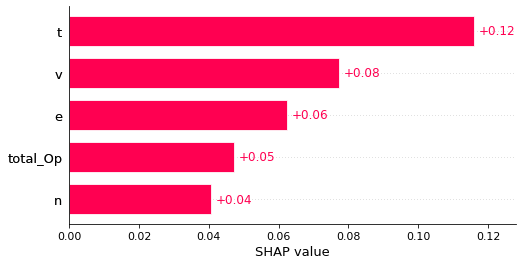

In [18]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_values[file_to_be_explained_idx, :, 1], show=True)

## BreakDown

In [25]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['e', 't', 'v', 'n', 'total_Op', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [26]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [27]:
#necessary imports
from pyBreakDown.explainer import Explainer
from pyBreakDown.explanation import Explanation
#make explainer object
exp = Explainer(clf=our_rf_model, data= X_train, colnames=features)

In [28]:
#make explanation object that contains all information

explanation = exp.explain(observation=X_train.iloc[0,:].values,direction="up",useIntercept=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

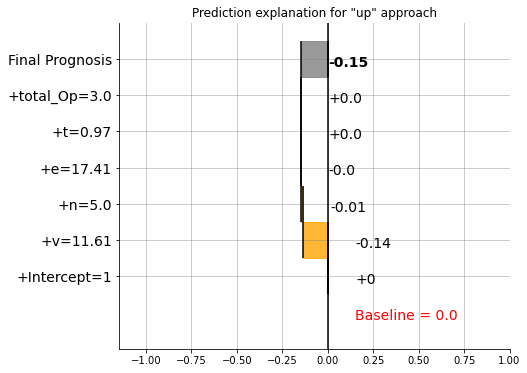

In [29]:
explanation.visualize()

## PyExplainer

In [63]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['e', 't', 'v', 'n', 'total_Op', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [65]:
rf_model

RandomForestClassifier(random_state=0)

In [66]:
X_train

,e,t,v,n,total_Op
4029,17.41,0.97,11.61,5.0,3.0
3671,299.53,16.64,89.86,23.0,13.0
6238,0.00,0.00,0.00,0.0,0.0
1432,44517.84,2473.21,1640.30,265.0,147.0
4140,1733.50,96.31,162.52,37.0,21.0
...,...,...,...,...,...
5738,1541.07,85.62,211.52,45.0,28.0
5195,1492.92,82.94,133.98,31.0,19.0
5394,7177.38,398.74,384.50,85.0,61.0
862,11090.46,616.14,454.00,90.0,54.0


In [67]:
X_test

,e,t,v,n,total_Op
10490,79.25,4.40,31.70,10.0,6.0
7211,210218.88,11678.83,3445.54,568.0,363.0
7109,161.94,9.00,43.19,13.0,8.0
5567,11966.77,664.82,599.09,115.0,68.0
6677,17.41,0.97,11.61,5.0,3.0
...,...,...,...,...,...
7415,464855.46,25825.30,7880.05,1096.0,620.0
5701,12800.51,711.14,571.59,106.0,69.0
8302,32324.04,1795.78,1005.29,180.0,104.0
413,6239.78,346.65,332.79,77.0,52.0


In [68]:
615 in X_test.index.values.tolist()

True

In [69]:
pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome)

615    True
Name: defects, dtype: bool

In [70]:
rf_model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

In [72]:
from pyexplainer.pyexplainer_pyexplainer import PyExplainer
file_to_be_explained = 0
import numpy as np
np.random.seed(0)

pyexp = PyExplainer(X_train = X_train,
                           y_train = y_train,
                           indep = X_train.columns,
                           dep = outcome,
                           top_k_rules=5,
                           blackbox_model = rf_model)

# PyExplainer Step 2 - Generate the rule-based explanation of an instance to be explained
exp_obj = pyexp.explain(X_explain = X_test.loc[file_to_be_explained,:].to_frame().transpose(),
                        y_explain = pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome),
                        search_function = 'crossoverinterpolation',
                        max_iter=1000,
                        max_rules=20,
                        random_state=0,
                        reuse_local_model=True)

# Print rule 
exp_obj['top_k_positive_rules'][:1]

# Please use the code below to visualise the generated PyExplainer explanation (What-If interactive visualisation).
pyexp.visualise(exp_obj, title="Why this file is predicted as defect-introducing?")


set top_k_rules failed, top_k_rules should be int in range 1 - 15 (both included)
PyExplainer can not find rules to avoid!
This could lead to blank explanation UI!
Please check whether the global model is properly trained with sufficient training data.


Output(layout=Layout(border='3px solid black'))

FloatSlider(value=1.2, continuous_update=False, description='#1 The value of total_Op is more than 1.2', layou…

FloatSlider(value=1.3, continuous_update=False, description='#2 The value of n is more than 1.3', layout=Layou…

In [73]:
## try

## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

train_dataset, test_dataset = train_test_split(data)

train_dataset.to_csv("train_dataset.csv", index=False)
test_dataset.to_csv("test_dataset.csv", index=False)

train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

# OWN_COMMIT - # code ownership
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# RatioCommentToCode - The ratio of lines of comments to lines of code

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]


class_labels = ['Clean', 'Defective']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [75]:
test_dataset

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,11.0,2.0,1.0,1.0,30.0,129.66,0.17,5.73,22.64,742.59,...,8,0,1,0,9.0,11.0,16.0,14.0,3.0,0
1,26.0,6.0,6.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,11.0,0
2,25.0,1.0,1.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0
3,82.0,12.0,11.0,6.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,23.0,1
4,5.0,1.0,1.0,1.0,15.0,51.89,0.34,2.92,17.79,151.35,...,3,0,0,0,5.0,6.0,8.0,7.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,151.0,7.0,1.0,6.0,277.0,1878.44,0.02,44.83,41.90,84205.78,...,80,32,33,3,52.0,58.0,177.0,100.0,12.0,1
2172,24.0,4.0,4.0,3.0,75.0,384.70,0.10,10.34,37.20,3978.11,...,18,0,4,0,13.0,22.0,40.0,35.0,7.0,0
2173,19.0,4.0,4.0,3.0,62.0,276.48,0.07,15.00,18.43,4147.27,...,14,0,3,0,11.0,11.0,32.0,30.0,7.0,0
2174,8.0,1.0,1.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0


In [79]:
from pyexplainer.pyexplainer_pyexplainer import PyExplainer
file_to_be_explained = 0
import numpy as np
np.random.seed(0)

pyexp = PyExplainer(X_train = X_train,
                           y_train = y_train,
                           indep = X_train.columns,
                           dep = outcome,
                           top_k_rules=5,
                           blackbox_model = rf_model)

# PyExplainer Step 2 - Generate the rule-based explanation of an instance to be explained
exp_obj = pyexp.explain(X_explain = X_test.loc[file_to_be_explained,:].to_frame().transpose(),
                        y_explain = pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome),
                        search_function = 'crossoverinterpolation',
                        max_iter=1000,
                        max_rules=20,
                        random_state=0,
                        reuse_local_model=True)

# Print rule 
exp_obj['top_k_positive_rules'][:1]

# Please use the code below to visualise the generated PyExplainer explanation (What-If interactive visualisation).
pyexp.visualise(exp_obj, title="Why this file is predicted as defect-introducing?")


set top_k_rules failed, top_k_rules should be int in range 1 - 15 (both included)
PyExplainer can not find rules to avoid!
This could lead to blank explanation UI!
Please check whether the global model is properly trained with sufficient training data.


Output(layout=Layout(border='3px solid black'))

FloatSlider(value=742.59, continuous_update=False, description='#1 The value of e is more than 742.59', layout…

FloatSlider(value=30.0, continuous_update=False, description='#2 The value of n is more than 30.0', layout=Lay…

FloatSlider(value=41.25, continuous_update=False, description='#3 The value of t is less than 41.25', layout=L…

## PDP

In [42]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['e', 't', 'v', 'n', 'total_Op', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['e', 't', 'v', 'n', 'total_Op']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [43]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [44]:
import numpy as np
import pandas as pd
# sklearn version: v1.0.1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
import matplotlib.pyplot as plt
import seaborn as sns


file_to_be_explained = 897

print(f'Explaining {file_to_be_explained} with PDP')

Explaining 897 with PDP


## Average Value of e

In [80]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [0], kind = 'average')

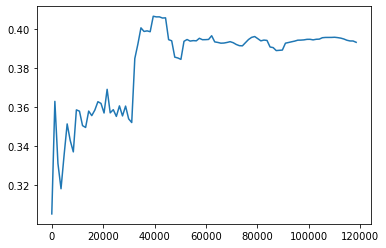

In [81]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of t

In [82]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [1], kind = 'average')

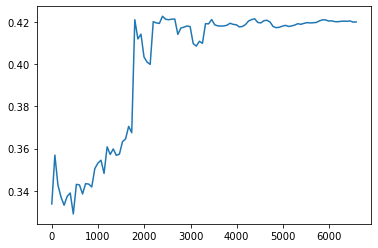

In [83]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of v

In [84]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [2], kind = 'average')

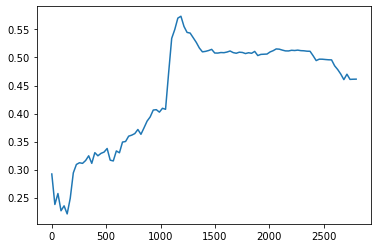

In [85]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of n

In [86]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [3], kind = 'average')

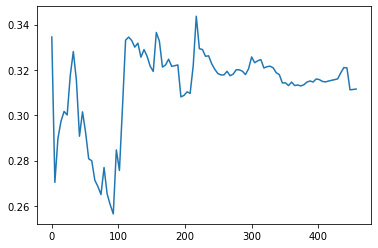

In [87]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of total_Op

In [88]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [4], kind = 'average')

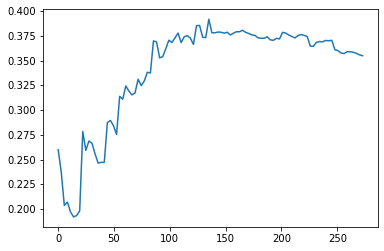

In [89]:
plt.plot(results['values'][0], results['average'][0])

## ICE

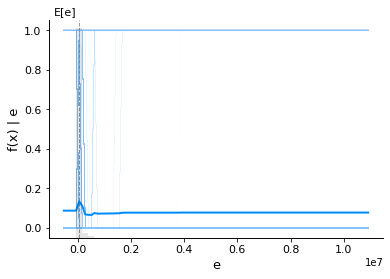

In [90]:
import subprocess
import sys
import importlib
import numpy
import shap

shap.plots.partial_dependence(
    "e", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

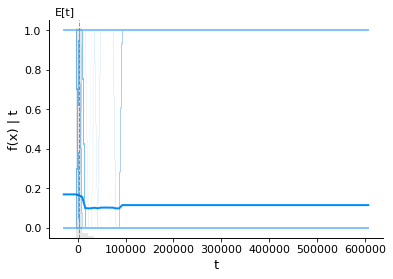

In [91]:
shap.plots.partial_dependence(
    "t", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

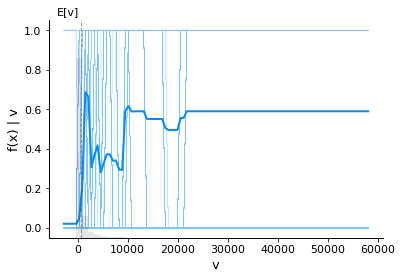

In [92]:
shap.plots.partial_dependence(
    "v", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

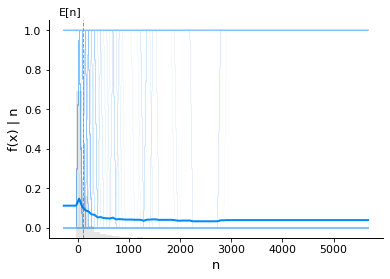

In [93]:
shap.plots.partial_dependence(
    "n", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

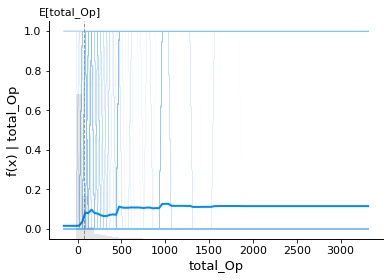

In [94]:
shap.plots.partial_dependence(
    "total_Op", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)